In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
#  Load data
df = pd.read_csv('../data/skytrax_reviews.csv', sep=';', index_col=0)

<Axes: >

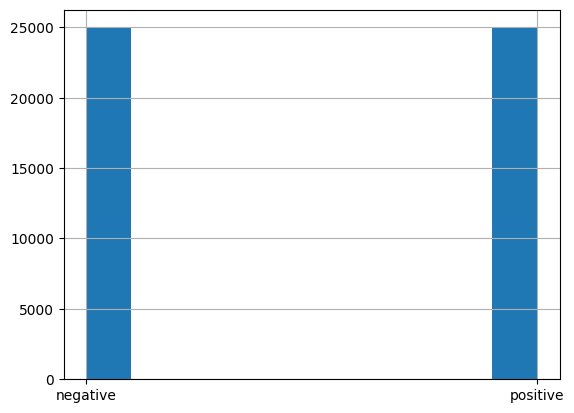

In [3]:
df['Sentiment'].hist()

In [4]:
# Binarize

df['binary_label'] = df['Sentiment'].map({'positive': 1, 'negative':0})

In [5]:
# Test dataset
# Target values

Y = df['binary_label'].to_numpy()

In [6]:
# Split data

df_train, df_test, Ytrain, Ytest = train_test_split(df['review_text'].values.astype('U'), Y, test_size=0.33)

In [7]:
# Feature Engineering

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [8]:
# Creating the model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train Accuracy:", model.score(Xtrain, Ytrain))
print("Test Accuracy:", model.score(Xtest, Ytest))

Train Accuracy: 0.8917014925373135
Test Accuracy: 0.8827272727272727


In [9]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("Train F1:", f1_score(Ytrain, Ptrain))
print("Test F1:", f1_score(Ytest, Ptest))

Train F1: 0.8949380284953087
Test F1: 0.8869941015009052


In [10]:
# AUC
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC", roc_auc_score(Ytrain, Prob_train))
print("test AUC", roc_auc_score(Ytest, Prob_test))

train AUC 0.9496271336142197
test AUC 0.9430553301563991


In [11]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[14420,  2395],
       [ 1233, 15452]], dtype=int64)

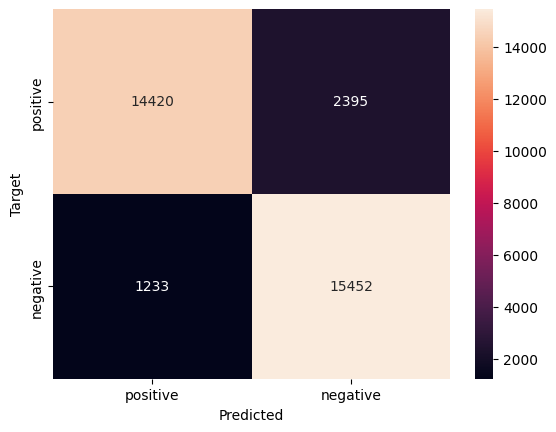

In [12]:
# Plotting the confusion matrix
def plot_cm(cm):
  classes = ['positive', 'negative']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)